# <b>CAR ACCIDENT SEVERITY</b>

## IBM Data Science Coursera Capstone


### Importing the required Python packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, jaccard_similarity_score, f1_score

!conda install -c conda-forge folium=0.5.0 --yes
import folium


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

## Data Collection (Loading the Dataset)

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ceff498ba65649daac4db37dcebeee09 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hkAN0EeE46c8d9Ied7JDgJ_x4uh-vVNRokF0-gxqxJ2j',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ceff498ba65649daac4db37dcebeee09.get_object(Bucket='caraccidentseverity-donotdelete-pr-g5g44pskcgt4hv',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

main_df = pd.read_csv(body)
main_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Data

In [3]:
main_df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
main_df.shape

(194673, 38)

In [5]:
#checking for duplicate records
main_df.duplicated().sum()

0

In [6]:
#extracting useful variables
df_use = main_df[['SEVERITYCODE','X','Y', 'PERSONCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL', 'ROADCOND', 
                  'LIGHTCOND', 'WEATHER','ADDRTYPE']]
df_use.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,ROADCOND,LIGHTCOND,WEATHER,ADDRTYPE
0,2,-122.323148,47.703140,2,2,NaN,N,Wet,Daylight,Overcast,Intersection
1,1,-122.347294,47.647172,2,2,NaN,0,Wet,Dark - Street Lights On,Raining,Block
2,1,-122.334540,47.607871,4,3,NaN,0,Dry,Daylight,Overcast,Block
3,1,-122.334803,47.604803,3,3,NaN,N,Dry,Daylight,Clear,Block
4,2,-122.306426,47.545739,2,2,NaN,0,Wet,Daylight,Raining,Intersection


In [7]:
df_use.shape

(194673, 11)

## Data Cleaning or Pre-processing

In [8]:
#dropping a duplicated coloumn 'SEVERITYCODE.1'
main_df.drop('SEVERITYCODE.1',axis=1,inplace= True)
main_df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


### Dealing with Null and Unknown Values

In [9]:
#replacing NaN values in 'INATTENTIONIND' with 0
df_use['INATTENTIONIND'].replace(np.nan,'N', inplace=True)
df_use.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,ROADCOND,LIGHTCOND,WEATHER,ADDRTYPE
0,2,-122.323148,47.703140,2,2,N,N,Wet,Daylight,Overcast,Intersection
1,1,-122.347294,47.647172,2,2,N,0,Wet,Dark - Street Lights On,Raining,Block
2,1,-122.334540,47.607871,4,3,N,0,Dry,Daylight,Overcast,Block
3,1,-122.334803,47.604803,3,3,N,N,Dry,Daylight,Clear,Block
4,2,-122.306426,47.545739,2,2,N,0,Wet,Daylight,Raining,Intersection


In [10]:
#dropping 'Unknown' values

index = df_use[df_use['PERSONCOUNT']=='Unknown'].index
df_use = df_use.drop(index=index)

index = df_use[df_use['VEHCOUNT']=='Unknown'].index
df_use = df_use.drop(index=index)

index = df_use[df_use['INATTENTIONIND']=='Unknown'].index
df_use = df_use.drop(index=index)

index = df_use[df_use['UNDERINFL']=='Unknown'].index
df_use = df_use.drop(index=index)

index = df_use[df_use['ROADCOND']=='Unknown'].index
df_use = df_use.drop(index=index)

index = df_use[df_use['LIGHTCOND']=='Unknown'].index
df_use = df_use.drop(index=index)

index = df_use[df_use['WEATHER']=='Unknown'].index
df_use = df_use.drop(index=index)

index = df_use[df_use['ADDRTYPE']=='Unknown'].index
df_use = df_use.drop(index=index)

#dropping the null values
df_use = df_use.dropna()

del(index)

print(df_use.shape)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


(166705, 11)


### Encoding the selected variables 

In [11]:
#encoding the different categorical variables in the dataframe

e= LabelEncoder()

df_use['underinfl'] = e.fit_transform(df_use['UNDERINFL'])
df_use['inattention'] = e.fit_transform(df_use['INATTENTIONIND'])
df_use['roadcond'] = e.fit_transform(df_use['ROADCOND'])
df_use['lightcond'] = e.fit_transform(df_use['LIGHTCOND'])
df_use['weather'] = e.fit_transform(df_use['WEATHER'])
df_use['personcount'] = e.fit_transform(df_use['PERSONCOUNT'])
df_use['vehcount'] = e.transform(df_use['VEHCOUNT'])

df_use.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,ROADCOND,LIGHTCOND,WEATHER,ADDRTYPE,underinfl,inattention,roadcond,lightcond,weather,personcount,vehcount
0,2,-122.323148,47.703140,2,2,N,N,Wet,Daylight,Overcast,Intersection,2,0,7,5,4,2,2
1,1,-122.347294,47.647172,2,2,N,0,Wet,Dark - Street Lights On,Raining,Block,0,0,7,2,6,2,2
2,1,-122.334540,47.607871,4,3,N,0,Dry,Daylight,Overcast,Block,0,0,0,5,4,4,3
3,1,-122.334803,47.604803,3,3,N,N,Dry,Daylight,Clear,Block,2,0,0,5,1,3,3
4,2,-122.306426,47.545739,2,2,N,0,Wet,Daylight,Raining,Intersection,0,0,7,5,6,2,2


## Exploratory Data Analysis

In [12]:
#different categories of 'ROADCOND', 'LIGHTCOND', 'WEATHER' and 'ADDRTYPE'

road_cond = df_use['ROADCOND'].unique()
light_cond = df_use['LIGHTCOND'].unique()
weather_cond = df_use['WEATHER'].unique()
address_type = main_df['ADDRTYPE'].unique()

print(road_cond, light_cond, weather_cond, address_type, sep='\n\n')

df_use = df_use[df_use['ROADCOND'].isin(road_cond)]
df_use = df_use[df_use['LIGHTCOND'].isin(light_cond)]
df_use = df_use[df_use['WEATHER'].isin(weather_cond)]
df_use = df_use[df_use['ADDRTYPE'].isin(address_type)]

['Wet' 'Dry' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt' 'Standing Water'
 'Oil']

['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Dusk'
 'Dawn' 'Dark - Street Lights Off' 'Other' 'Dark - Unknown Lighting']

['Overcast' 'Raining' 'Clear' 'Snowing' 'Other' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']

['Intersection' 'Block' 'Alley' nan]


### Subplots

Text(0.5, 1.0, 'Accident distribution at different Address types')

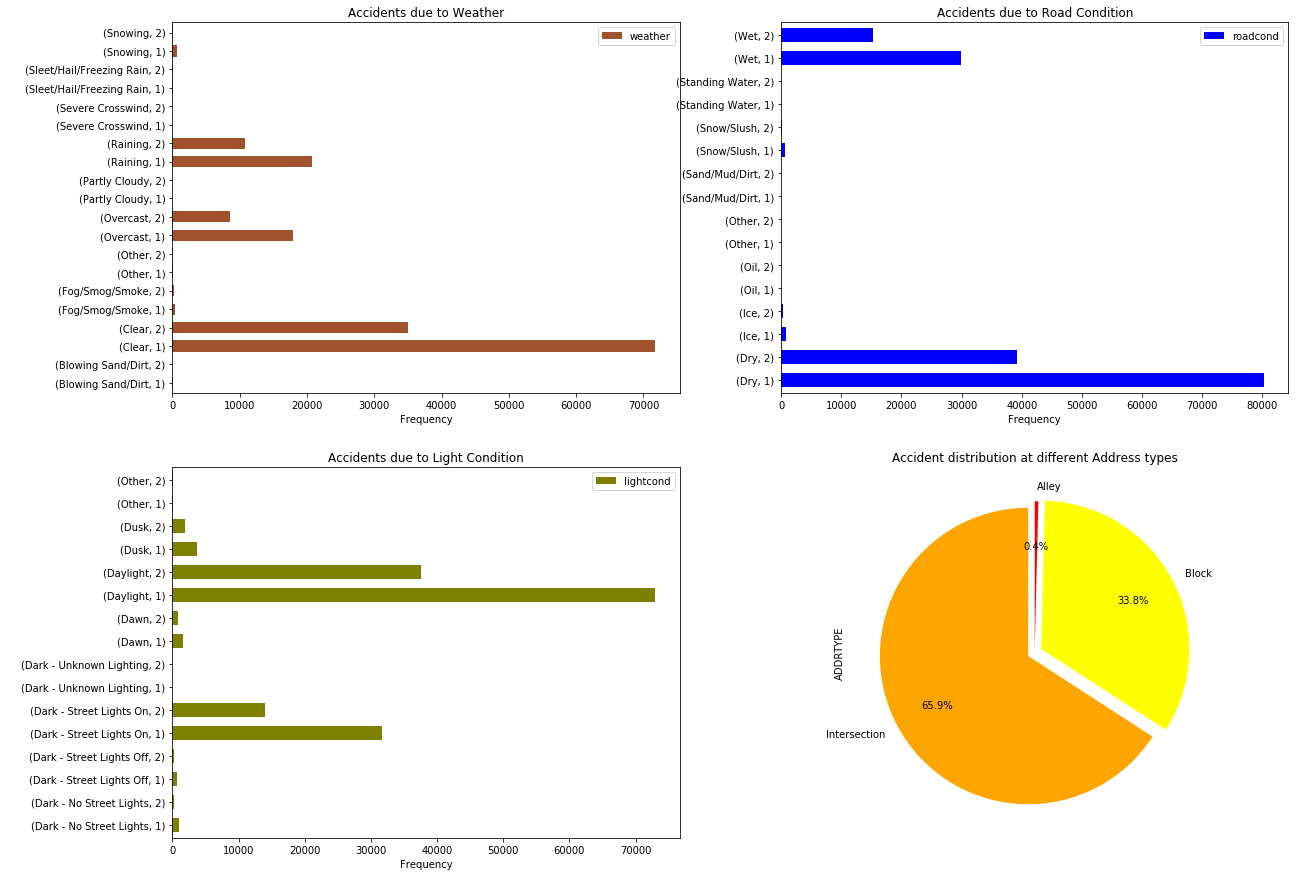

In [13]:
#subplot containing histograms and pie chart

subplots=plt.figure()
ax0=subplots.add_subplot(2,2,1)
ax1=subplots.add_subplot(2,2,2)
ax2=subplots.add_subplot(2,2,3)
ax3=subplots.add_subplot(2,2,4)


df_use[['WEATHER', 'SEVERITYCODE','weather']].groupby(['WEATHER', 'SEVERITYCODE']).count().plot(
    kind='barh', ax=ax0, color='sienna', figsize=(20,15), fontsize=10,width=0.6)
ax0.set_title("Accidents due to Weather")
ax0.set_xlabel("Frequency")
ax0.set_ylabel(" ")

df_use[['ROADCOND', 'SEVERITYCODE','roadcond']].groupby(['ROADCOND', 'SEVERITYCODE']).count().plot(
    kind='barh', ax=ax1, color='blue', figsize=(20,15), fontsize=10,width=0.6)
ax1.set_title("Accidents due to Road Condition")
ax1.set_xlabel("Frequency")
ax1.set_ylabel(" ")

df_use[['LIGHTCOND', 'SEVERITYCODE','lightcond']].groupby(['LIGHTCOND', 'SEVERITYCODE']).count().plot(
    kind='barh', ax=ax2, color='olive', figsize=(20, 15), fontsize=10,width=0.6)
ax2.set_title("Accidents due to Light Condition")
ax2.set_xlabel("Frequency")
ax2.set_ylabel(" ")

explode_list = [0.05, 0.05,0.02]
colours=['orange','yellow','red']
main_df['ADDRTYPE'].value_counts().plot(kind='pie', ax=ax3, figsize=(20,15), autopct='%1.1f%%', startangle=90, 
                                       labels= address_type, pctdistance=0.7, colors=colours, explode= explode_list)
ax3.set_title("Accident distribution at different Address types")

In [14]:
#selecting data for correlation
data = df_use[['SEVERITYCODE', 'personcount','vehcount','inattention','underinfl', 'roadcond', 'lightcond', 'weather']]
data.dtypes

SEVERITYCODE    int64
personcount     int64
vehcount        int64
inattention     int64
underinfl       int64
roadcond        int64
lightcond       int64
weather         int64
dtype: object

### Correlation

In [15]:
#correlation matrix of encoded variables
data.corr()

,SEVERITYCODE,personcount,vehcount,inattention,underinfl,roadcond,lightcond,weather
SEVERITYCODE,1.000000,0.114397,-0.082431,0.028650,0.032599,0.007894,0.034906,0.002978
personcount,0.114397,1.000000,0.404604,0.065494,-0.035717,0.001544,0.009350,0.001523
vehcount,-0.082431,0.404604,1.000000,0.050103,-0.018940,-0.015238,0.034706,-0.013342
inattention,0.028650,0.065494,0.050103,1.000000,0.102525,-0.029885,0.058230,-0.031643
underinfl,0.032599,-0.035717,-0.018940,0.102525,1.000000,0.021703,-0.051017,0.008098
roadcond,0.007894,0.001544,-0.015238,-0.029885,0.021703,1.000000,-0.156775,0.799185
lightcond,0.034906,0.009350,0.034706,0.058230,-0.051017,-0.156775,1.000000,-0.141593
weather,0.002978,0.001523,-0.013342,-0.031643,0.008098,0.799185,-0.141593,1.000000


### Heatmaps

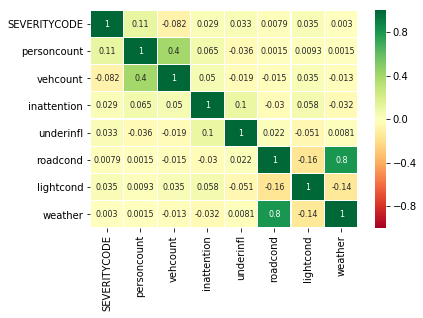

In [16]:
#heatmap for showing correlation between encoded variables 
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':8})

### OpenStreetMap of Seattle with Markers

In [17]:
#Seattle latitude and longitude
latitude = 47.6062
longitude = -122.3321

#create the map 
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)


In [18]:
# instantiate a feature group for the accidents in the dataframe
accidents = folium.map.FeatureGroup()

# loop through the last 705 accidents and add each to the accidents feature group
limit = df_use.iloc [166000:166706]

for lat, lng in zip(limit.Y, limit.X):
    accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='red',
            fill=True,
            fill_color='white',
            fill_opacity=1
        )
    )

# add accidents to map
seattle_map.add_child(accidents)

## Data Preparation

In [19]:
#selecting the feature(X) and target(y) datasets
feature = df_use[['underinfl','inattention','roadcond', 'lightcond','weather','personcount','vehcount']]
target = df_use['SEVERITYCODE']

In [20]:
#converting datasets to arrays
X=np.asarray(feature)
y=np.asarray(target)

In [21]:
print(X,y)

[[2 0 7 ... 4 2 2]
 [0 0 7 ... 6 2 2]
 [0 0 0 ... 4 4 3]
 ...
 [2 0 0 ... 1 3 2]
 [2 0 0 ... 1 2 1]
 [2 0 7 ... 1 2 2]] [2 1 1 ... 2 2 1]


## Data Modelling

In [22]:
#splitting datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

### 1. Decision Trees

In [23]:
#Decision Tree
SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) 
SeverityTree.fit(X_train, y_train)

predTree = SeverityTree.predict(X_test)

#Decision Tree evaluation metrics

dtc1 = jaccard_similarity_score(y_test, predTree)
dtc2 = f1_score(y_test, predTree, average='weighted')
dtcac = accuracy_score(y_test, predTree)

print(predTree[0:101])
print(y_test[0:101])
print(dtc1,dtc2)

[2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1]
[2 2 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 2 2 1 1 2 1 1 1 2 1 1 1 1 2 2 1 1 1
 1 1 1 1 2 1 2 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 2 2 2 2 1 1 1 2 1 1 2 2 1
 2 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1]
0.7255031342791158 0.6840157664970751


### 2. Support Vector Machines

In [24]:
#Support Vector Machine
clf = svm.SVC(kernel='sigmoid', gamma= 'auto')
clf.fit(X_train, y_train) 

svm_yhat = clf.predict(X_test)

#Support Vector Machine evaluation metrics

svm1 = jaccard_similarity_score(y_test, svm_yhat)
svm2 = f1_score(y_test, svm_yhat, average='weighted')

print(svm_yhat[0:101])
print(y_test[0:101])
print(svm1,svm2)

[1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 1 1 2 2 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 2 1
 1 1 2 1 2 1 2 1 1 2 1 2 1 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 2
 2 1 2 1 2 1 2 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1]
[2 2 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 2 2 1 1 2 1 1 1 2 1 1 1 1 2 2 1 1 1
 1 1 1 1 2 1 2 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 2 2 2 2 1 1 1 2 1 1 2 2 1
 2 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1]
0.5287783809723764 0.5292081052710012


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.65      0.65      0.65     22383
           2       0.28      0.29      0.29     10958

   micro avg       0.53      0.53      0.53     33341
   macro avg       0.47      0.47      0.47     33341
weighted avg       0.53      0.53      0.53     33341

Confusion matrix, without normalization
[[14488  7895]
 [ 7816  3142]]


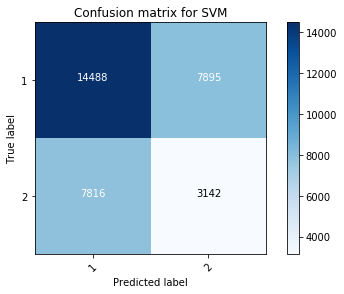

In [26]:
#compute confusion matrix
cnf_matrix_svm = confusion_matrix(y_test, svm_yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, svm_yhat))

#plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_svm, classes=['1','2'],normalize= False,  title='Confusion matrix for SVM')

### 3. K - Nearest Neighbours

In [27]:
#K-Nearest Neighbours

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

K = 20
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
    
    #Train Model and Predict  
    neighbours = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    knn_yhat=neighbours.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn_yhat)

    
    std_acc[n-1]=np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

print(mean_acc)

print( "The best accuracy was:", mean_acc.max(), "when k=", mean_acc.argmax()+1) 

#K-Nearest Neighbours evaluation metrics

knn1 = jaccard_similarity_score(y_test, knn_yhat)
knn2 = f1_score(y_test, knn_yhat, average='weighted')

print(knn1, knn2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[0.58 0.67 0.67 0.68 0.68 0.7  0.71 0.71 0.71 0.72 0.71 0.72 0.72 0.72
 0.72 0.72 0.72 0.72 0.72]
The best accuracy was: 0.7206742449236676 when k= 16
0.7163252451936055 0.6797367492223977


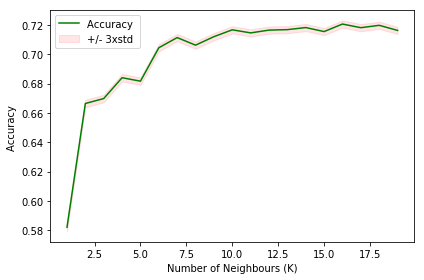

In [28]:
#K-Nearest Neighbours accuracy plot

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10, color='red')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

### 4. Logistic Regression

In [29]:
#Logistic Regression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

ypred = LR.predict(X_test)

yhat_prob = LR.predict_proba(X_test)

#Logistic Regression evaluation metrics

lr1 = jaccard_similarity_score(y_test, ypred)
lr2 = f1_score(y_test, ypred, average='weighted')
lr3 = log_loss(y_test, yhat_prob)

print(yhat_prob)
print(lr1,lr2,lr3)

[[0.4  0.6 ]
 [0.54 0.46]
 [0.73 0.27]
 ...
 [0.76 0.24]
 [0.58 0.42]
 [0.75 0.25]]
0.6777541165531927 0.5848664768733021 0.6128722671180494


              precision    recall  f1-score   support

           1       0.68      0.97      0.80     22383
           2       0.57      0.08      0.14     10958

   micro avg       0.68      0.68      0.68     33341
   macro avg       0.63      0.53      0.47     33341
weighted avg       0.65      0.68      0.58     33341

Confusion matrix, without normalization
[[21707   676]
 [10068   890]]


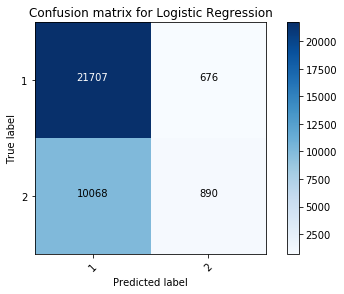

In [30]:
#compute confusion matrix
cnf_matrix_lr = confusion_matrix(y_test, ypred, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, ypred))

#plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=['1','2'],normalize= False,  title='Confusion matrix for Logistic Regression')

## Model Evaluation

In [31]:
#accuracy table

jss_list = [knn1, dtc1, svm1, lr1]
f1s_list = [knn2, dtc2, svm2, lr2]
ll_list = ['NA', 'NA', 'NA', lr3]

coloumns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard Similarity Score', 'F1-score', 'Logloss']

accuracy_df = pd.DataFrame([jss_list, f1s_list, ll_list], index = index, columns = coloumns)

accuracy_df_trans = accuracy_df.transpose()
accuracy_df_trans.columns.name = 'Algorithm'
accuracy_df_trans

Algorithm,Jaccard Similarity Score,F1-score,Logloss
KNN,0.716325,0.679737,NA
Decision Tree,0.725503,0.684016,NA
SVM,0.528778,0.529208,NA
Logistic Regression,0.677754,0.584866,0.612872
